In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/clustering-penguins-species/penguins.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/clustering-penguins-species/penguins.csv")

In [3]:
df1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# Dataframe Info

In [4]:
df1.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
df1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [7]:
df1.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [8]:
df1.rename(columns = {'culmen_length_mm' : "culmen_len", 'culmen_depth_mm' : "culmen_depth", 'flipper_length_mm' : "flipper_len",
                      'body_mass_g': "body_mass"},inplace = True)

# EDA

In [9]:
df1.isnull().sum()

culmen_len      2
culmen_depth    2
flipper_len     2
body_mass       2
sex             9
dtype: int64

In [10]:
#index 3 and 339 needs to be deleted as they are completely null
df1[df1.isnull().any(axis=1)]

,culmen_len,culmen_depth,flipper_len,body_mass,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
339,NaN,NaN,NaN,NaN,NaN


In [11]:
#dropping index [3,339] and reseting the index

df1.drop(index = [3,339],inplace = True)
df1.reset_index(inplace = True, drop = True)

In [12]:
df1["sex"].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [13]:
df1.drop(index = df1[df1['sex'] == '.'].index,inplace= True)
df1.reset_index(inplace = True, drop = True)

# Univariate and Bi variate Analysis

In [14]:
df1["sex"].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

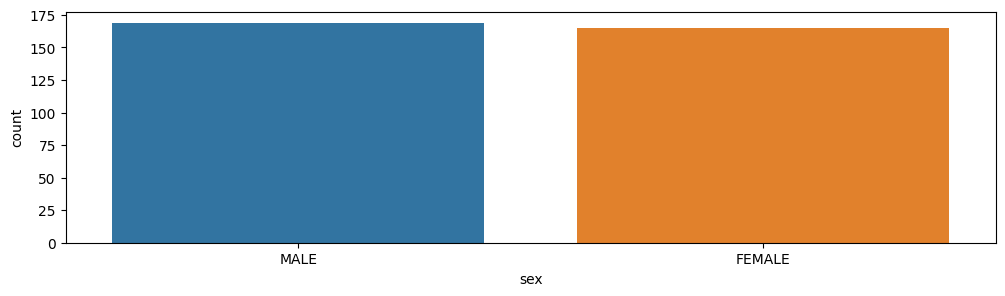

In [15]:
plt.figure(figsize = (12,3))
sns.countplot(df1, x = "sex")

In [16]:
df1.columns

Index(['culmen_len', 'culmen_depth', 'flipper_len', 'body_mass', 'sex'], dtype='object')

In [17]:
print("                                   Mean and Median of all columns wrt MALE gender")
print("Mean of culmen_len of pop : ",round(df1[df1["sex"] == "MALE"]['culmen_len'].mean(),1),"        Median of pop : ",round(df1[df1["sex"] == "MALE"]['culmen_len'].median(),1))
print("Mean of culmen_depth of pop : ",round(df1[df1["sex"] == "MALE"]['culmen_depth'].mean(),1),"      Median of pop : ",round(df1[df1["sex"] == "MALE"]['culmen_depth'].median(),1))
print("Mean of flipper_len of pop : ",round(df1[df1["sex"] == "MALE"]['flipper_len'].mean(),1),"      Median of pop : ",round(df1[df1["sex"] == "MALE"]['flipper_len'].median(),1))
print("Mean of body_mass of pop : ",round(df1[df1["sex"] == "MALE"]['body_mass'].mean(),1),"       Median of pop : ",round(df1[df1["sex"] == "MALE"]['body_mass'].median(),1))


                                   Mean and Median of all columns wrt MALE gender
Mean of culmen_len of pop :  45.8         Median of pop :  46.8
Mean of culmen_depth of pop :  17.9       Median of pop :  18.5
Mean of flipper_len of pop :  230.9       Median of pop :  201.0
Mean of body_mass of pop :  4543.9        Median of pop :  4300.0


In [18]:
print("                                   Mean and Median of all columns wrt FEMALE gender")
print("Mean of culmen_len of pop : ",round(df1[df1["sex"] == "FEMALE"]['culmen_len'].mean(),1),"        Median of pop : ",round(df1[df1["sex"] == "FEMALE"]['culmen_len'].median(),1))
print("Mean of culmen_depth of pop : ",round(df1[df1["sex"] == "FEMALE"]['culmen_depth'].mean(),1),"      Median of pop : ",round(df1[df1["sex"] == "FEMALE"]['culmen_depth'].median(),1))
print("Mean of flipper_len of pop : ",round(df1[df1["sex"] == "FEMALE"]['flipper_len'].mean(),1),"      Median of pop : ",round(df1[df1["sex"] == "FEMALE"]['flipper_len'].median(),1))
print("Mean of body_mass of pop : ",round(df1[df1["sex"] == "FEMALE"]['body_mass'].mean(),1),"       Median of pop : ",round(df1[df1["sex"] == "FEMALE"]['body_mass'].median(),1))


                                   Mean and Median of all columns wrt FEMALE gender
Mean of culmen_len of pop :  42.1         Median of pop :  42.8
Mean of culmen_depth of pop :  16.4       Median of pop :  17.0
Mean of flipper_len of pop :  197.4       Median of pop :  193.0
Mean of body_mass of pop :  3862.3        Median of pop :  3650.0


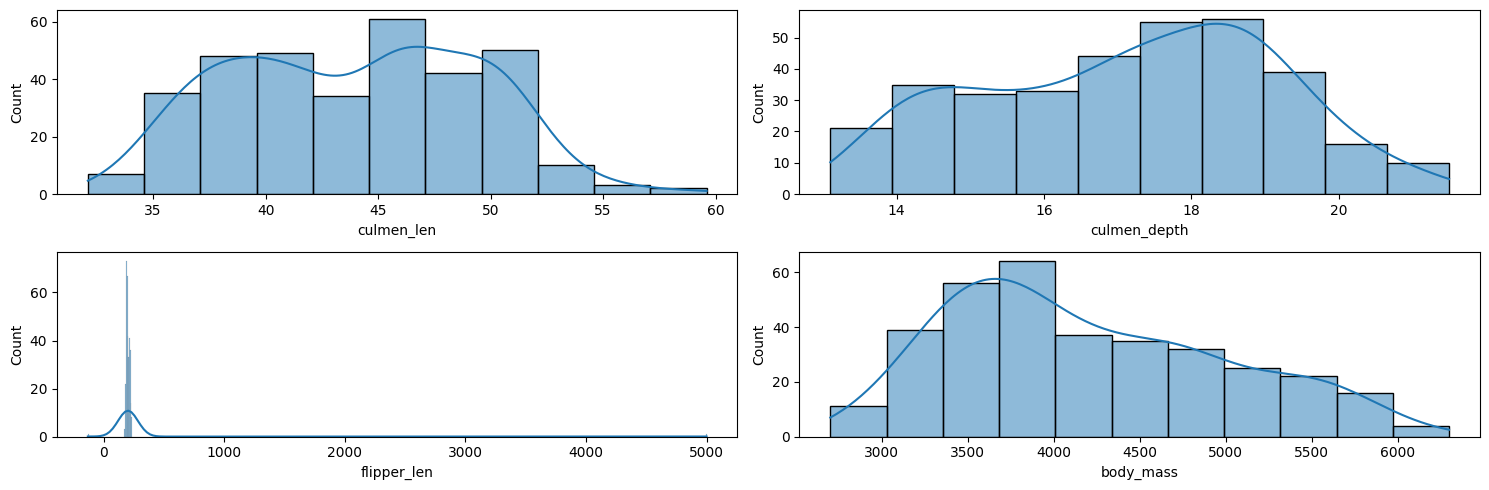

In [19]:
plt.figure(figsize = (15,5))
df1_num = df1.select_dtypes(exclude = "object")

for i in range(len(df1_num.columns)):
    plt.subplot(2,2,i+1)
    sns.histplot(df1,x = df1_num[df1_num.columns[i]],kde =True)
    
plt.tight_layout()

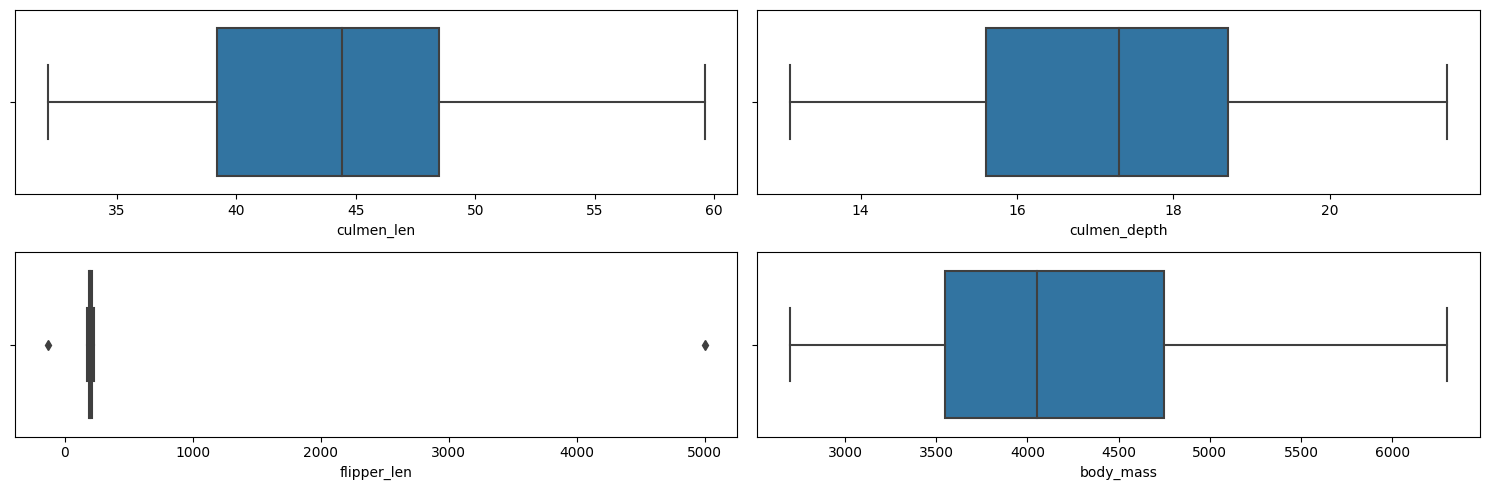

In [20]:
plt.figure(figsize = (15,5))
df1_num = df1.select_dtypes(exclude = "object")

for i in range(len(df1_num.columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df1_num,x = df1_num[df1_num.columns[i]])
    
plt.tight_layout()

### Inferences
#### Columns {culmen_len, culmen_depth, body_mass} needs to be transformed to make it normally distributed
#### Outliers from {flipper_len} needs to be removed.

# Outliers Treatment

In [21]:
indexes = df1[(df1["flipper_len"] >4000) | (df1["flipper_len"] < 0)].index

In [22]:
#removing outlier from the dataset
for i in indexes:
    df1.at[i,"flipper_len"] = np.nan

# Scaling 

In [23]:
#df['col_name'] = df['col_name'].apply(lambda x: mapping[x])
df1["sex"] = df1["sex"].apply(lambda x: {"MALE": 1, "FEMALE":0, np.nan:np.nan}[x])

In [24]:
df1_num = df1[["culmen_len","culmen_depth","flipper_len","body_mass"]]

In [25]:
from sklearn.preprocessing import StandardScaler as ss

df1_scaled = pd.DataFrame(ss().fit_transform(df1_num),columns = df1_num.select_dtypes(exclude = "object").columns)

In [26]:
df1_scaled = pd.concat([df1_scaled,df1["sex"]],axis =1)

# Missing Value Treatment

In [27]:
from sklearn.impute import KNNImputer as knnimp

#imputer = knnimp(n_neighbors = len(scaled_df_num.columns))
dfx_imputed = pd.DataFrame(knnimp(n_neighbors = 7).fit_transform(df1_scaled), columns =df1_scaled.columns )

# PCA : Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [29]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx_imputed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
new_df_pca = pca.fit_transform(dfx_imputed)
print(n_components)

2


# Modelling

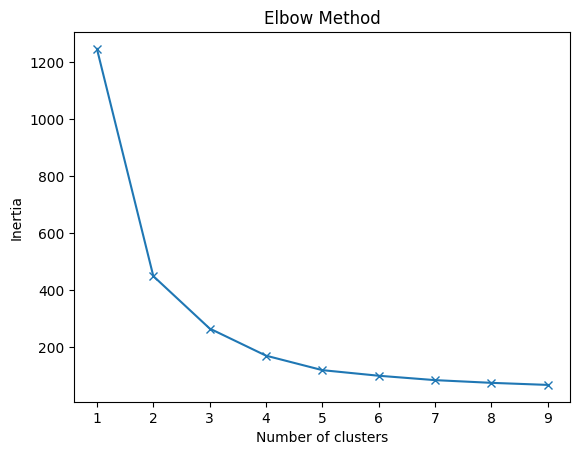

In [30]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(new_df_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, marker="x")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

##### Coclusion : Number of clusters should be 4

In [31]:
sse

[1246.0948048849514,
 448.6787032612357,
 264.61824253940415,
 169.35756782731326,
 118.51654680494818,
 98.89575853869499,
 83.50145988956513,
 74.00393852202977,
 66.69871297082459]

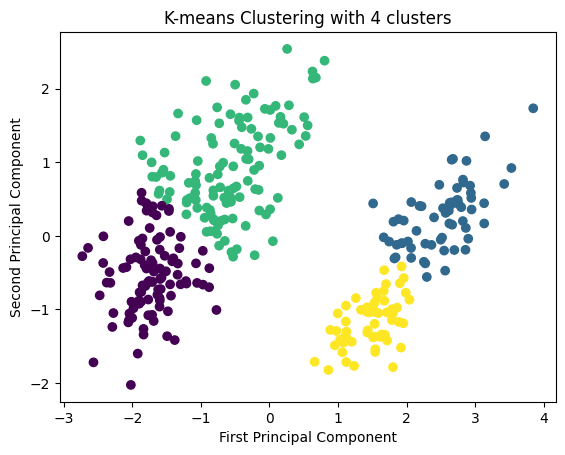

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(new_df_pca)
plt.scatter(new_df_pca[:, 0], new_df_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering with 4 clusters")
plt.show()